In [13]:
import matplotlib.pyplot as plt      
import numpy as np                   
from keras.datasets import mnist    
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, LeakyReLU, Flatten, Dense, PReLU

In [3]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

x_train_new = np.concatenate((x_train, 255 - x_train))
y_train_new = np.concatenate((y_train, y_train))
x_test_new = np.concatenate((x_test, 255 - x_test))
y_test_new = np.concatenate((y_test, y_test))

x_train_new, y_train_new = shuffle(x_train_new, y_train_new)
x_test_new, y_test_new = shuffle(x_test_new, y_test_new)

print("shape of input data for training (x_train) : ", x_train_new.shape)
print("shape of labels for training (y_train) : ", y_train_new.shape)
print("shape of input data for testing (x_test) : ", x_test_new.shape)
print("shape of label for testing (y_test) : ", y_test_new.shape)


11501568/11490434 [==============================] - 0s 0us/step
shape of input data for training (x_train) :  (120000, 28, 28)
shape of labels for training (y_train) :  (120000,)
shape of input data for testing (x_test) :  (20000, 28, 28)
shape of label for testing (y_test) :  (20000,)


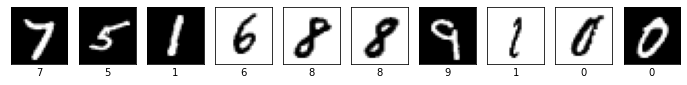

In [4]:
plt.figure(figsize=(12, 3))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.xlabel(y_train_new[i])
    plt.imshow(x_train_new[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])

plt.show()

In [5]:
x_train_new = np.reshape(x_train_new, (x_train_new.shape[0], x_train_new.shape[1], x_train_new.shape[2], 1))
x_test_new = np.reshape(x_test_new, (x_test_new.shape[0], x_test_new.shape[1], x_test_new.shape[2], 1))

print("reshaped x_train: ", x_train_new.shape)
print("reshaped x_test: ", x_test_new.shape)

reshaped x_train:  (120000, 28, 28, 1)
reshaped x_test:  (20000, 28, 28, 1)


In [6]:
x_train_new = x_train_new / 255 
x_test_new = x_test_new / 255 

y_train_new = to_categorical(y_train_new, num_classes=10)
y_test_new = to_categorical(y_test_new, num_classes=10)

In [7]:
def create_model(alpha):
    model = Sequential()
    model.add(Conv2D(8, 7, activation=LeakyReLU(alpha=alpha)))
    model.add(Conv2D(8, 5, activation=LeakyReLU(alpha=alpha)))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    return model

model = create_model(0.85)
model.build(x_train_new.shape)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (120000, 22, 22, 8)       400       
_________________________________________________________________
conv2d_1 (Conv2D)            (120000, 18, 18, 8)       1608      
_________________________________________________________________
flatten (Flatten)            (120000, 2592)            0         
_________________________________________________________________
dense (Dense)                (120000, 10)              25930     
Total params: 27,938
Trainable params: 27,938
Non-trainable params: 0
_________________________________________________________________
None


alpha is:  -1
Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1936 - accuracy: 0.9424
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0751 - accuracy: 0.9774
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0584 - accuracy: 0.9818
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0495 - accuracy: 0.9850
Epoch 5/5
625/625 [==============================] - 2s 3ms/step - loss: 0.0459 - accuracy: 0.9859
accuracy of test data:  0.9858999848365784
loss of test data:  0.0459156408905983


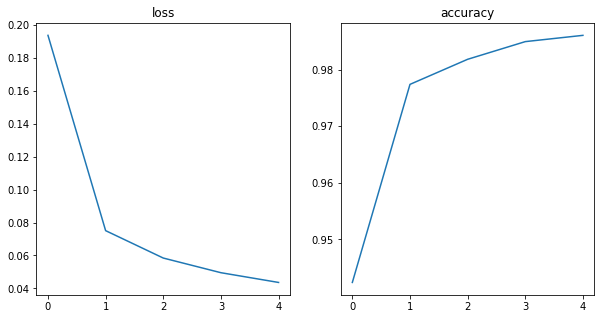

alpha is:  -0.5
Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.2064 - accuracy: 0.9389
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0747 - accuracy: 0.9770
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0575 - accuracy: 0.9825
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0506 - accuracy: 0.9840
Epoch 5/5
625/625 [==============================] - 2s 3ms/step - loss: 0.0549 - accuracy: 0.9830
accuracy of test data:  0.9829999804496765
loss of test data:  0.054870422929525375


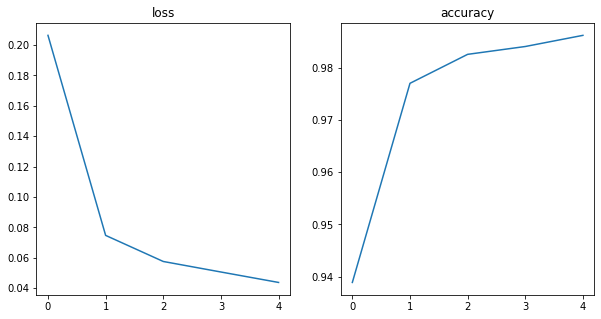

alpha is:  0
Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.2194 - accuracy: 0.9350
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0734 - accuracy: 0.9773
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0562 - accuracy: 0.9827
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0492 - accuracy: 0.9846
Epoch 5/5
625/625 [==============================] - 2s 3ms/step - loss: 0.0517 - accuracy: 0.9837
accuracy of test data:  0.9837499856948853
loss of test data:  0.051662854850292206


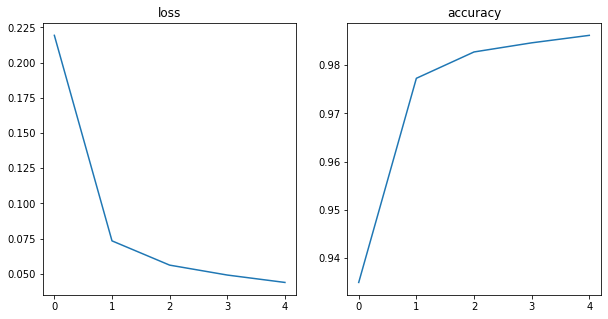

alpha is:  0.5
Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.3363 - accuracy: 0.8972
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.1093 - accuracy: 0.9672
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0926 - accuracy: 0.9716
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0833 - accuracy: 0.9743
Epoch 5/5
625/625 [==============================] - 2s 3ms/step - loss: 0.0698 - accuracy: 0.9781
accuracy of test data:  0.9781000018119812
loss of test data:  0.06976766884326935


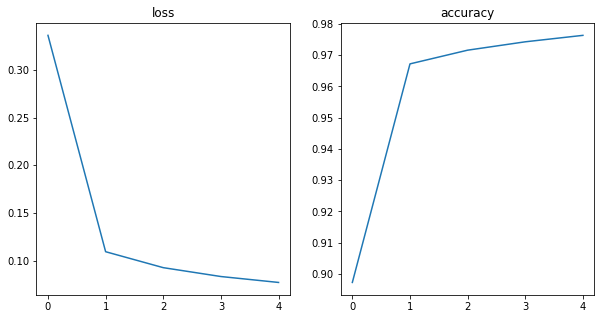

alpha is:  1
Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 2.3092 - accuracy: 0.1542
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 2.3045 - accuracy: 0.1493
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 2.3037 - accuracy: 0.1257
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 2.3037 - accuracy: 0.1238
Epoch 5/5
625/625 [==============================] - 2s 3ms/step - loss: 2.3042 - accuracy: 0.1337
accuracy of test data:  0.13369999825954437
loss of test data:  2.3041586875915527


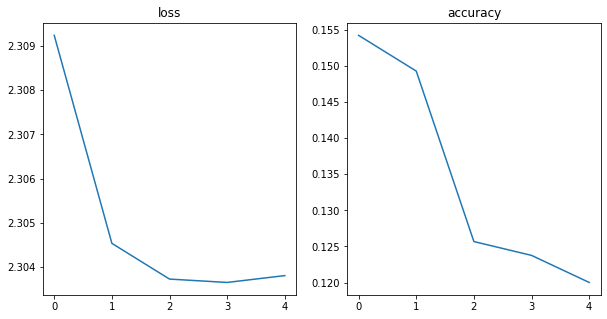

In [9]:
alphas = [-1, -0.5, 0, 0.5, 1]
for alpha in alphas:
    print("alpha is: ", alpha)
    model = create_model(alpha)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    h = model.fit(x_train_new, y_train_new, epochs=5, batch_size=128)
    
    loss, acc = model.evaluate(x_test_new, y_test_new) 
    print("accuracy of test data: ", acc)
    print("loss of test data: ", loss)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(h.history['loss'])
    plt.title('loss')

    plt.subplot(1, 2, 2)
    plt.plot(h.history['accuracy'])
    plt.title('accuracy')
    plt.show()
    


Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.2218 - accuracy: 0.9338
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0807 - accuracy: 0.9754
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0635 - accuracy: 0.9808
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0548 - accuracy: 0.9831
Epoch 5/5
625/625 [==============================] - 2s 3ms/step - loss: 0.0583 - accuracy: 0.9829
accuracy of test data:  0.9829000234603882
loss of test data:  0.058295201510190964


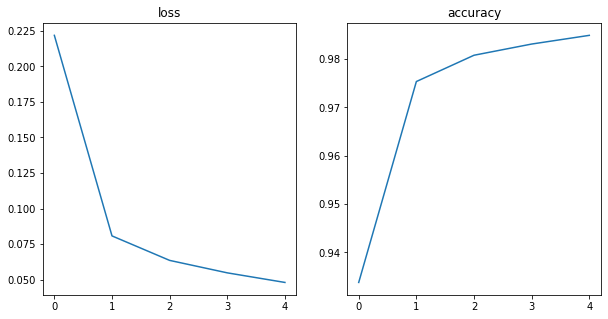

In [23]:
def create_model2():
    model = Sequential()
    model.add(Conv2D(8, 7, activation=PReLU(shared_axes=[1,2])))
    model.add(Conv2D(8, 5, activation=PReLU(shared_axes=[1,2])))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    return model


model2 = create_model2()
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model2.fit(x_train_new, y_train_new, epochs=5, batch_size=128)

loss, acc = model2.evaluate(x_test_new, y_test_new) 
print("accuracy of test data: ", acc)
print("loss of test data: ", loss)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(h.history['loss'])
plt.title('loss')

plt.subplot(1, 2, 2)
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.show()

In [26]:
print("alpha params in first layer weights: ", model2.layers[0].get_weights()[2])
print("alpha params in second layer weights: ", model2.layers[1].get_weights()[2])


alpha params in first layer weights:  [[[-0.02322879  0.24976456  0.2727916   0.38647506  0.06843951
   -0.03745963  0.30824876 -0.06797314]]]
alpha params in second layer weights:  [[[-0.24805605 -0.21426804 -0.36600178 -0.37278825 -0.13345793
   -0.31092107  0.20969895 -0.35918495]]]
